In [21]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from random import shuffle
from sklearn.preprocessing import scale

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

In [22]:
print(X.shape)

(70000, 784)


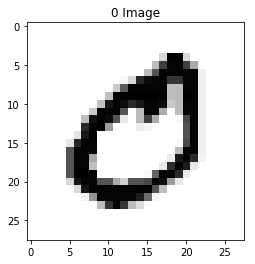

In [23]:
plt.title('0 Image')
plt.imshow(X[1].reshape((28,28)), cmap='Greys')

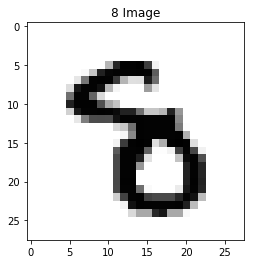

In [24]:
plt.title('8 Image')
plt.imshow(X[50000].reshape((28,28)), cmap='Greys')

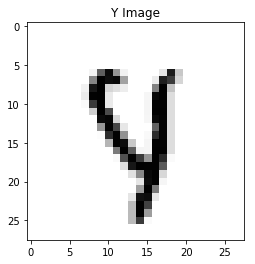

In [25]:
plt.title('Y Image')
plt.imshow(X[25000].reshape((28,28)), cmap='Greys')

In [26]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

# T-SNE

In [27]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.037s...
[t-SNE] Computed neighbors for 10000 samples in 14.547s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.927340
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.869766
[t-SNE] Error after 1000 iterations: 1.667095


I tried some other variations of different perplexities, n_iter, and learning rate and these were better at lowering the error.

In [28]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

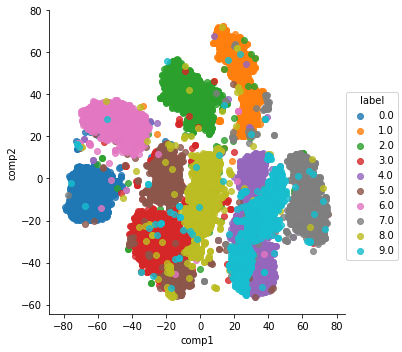

In [30]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

# Kmeans

In [31]:
kmeans_model = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans_model.fit_transform(X_pca[rows[:n_select],:])
sk_clusters = kmeans_model.predict(X_pca[rows[:n_select],:])

In [32]:
df_tsne['sk_clusters'] = y[rows[:n_select]]

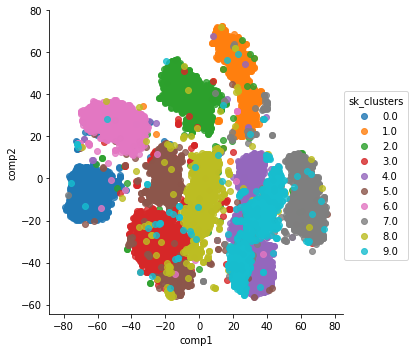

In [33]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='sk_clusters', fit_reg=False)

# Hierarchical Clustering

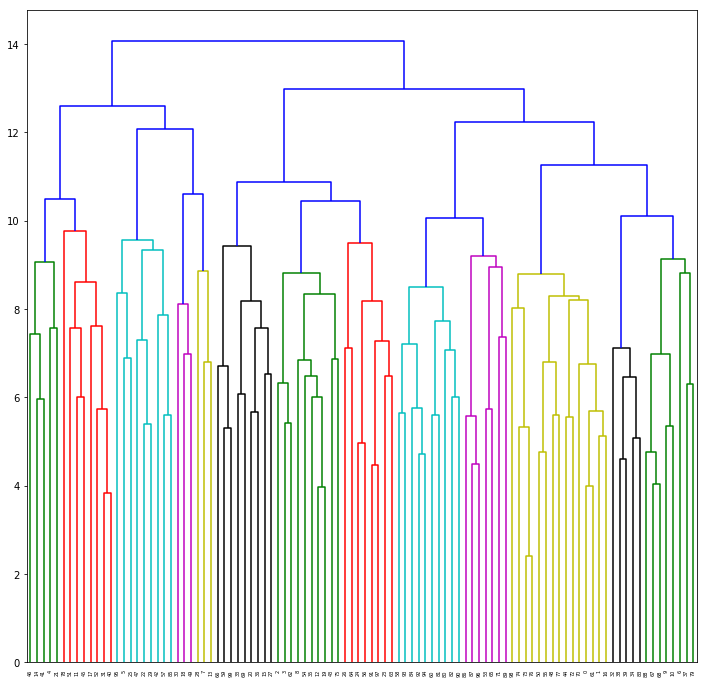

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X[0:100], 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

Complete was definitly the most intuitive representation of the clusters.